# Exploratory Data Analysis of New York Schools


PASSNYC uses public data to identify students within New York City’s under-performing school districts and, 
through consulting and collaboration with partners, aims to increase the diversity of students taking the
Specialized High School Admissions Test (SHSAT). By focusing efforts in under-performing areas that are 
historically underrepresented in SHSAT registration, we will help pave the path to specialized high schools 
for a more diverse group of students.

In [2]:
# Import the necessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns;sns.set(color_codes=True)

import  plotly.plotly  as py
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve

%matplotlib inline

%pwd


'C:\\Users\\manju\\Desktop\\Springboard\\Capstone1'

In [3]:
pd.set_option('display.max_columns', None)  
school = pd.read_csv('2016 School Explorer.csv')
#safety = pd.read_csv('../input/eport/2010-2016-school-safety-report.csv')
schools = pd.read_csv('2013_-_2018_Demographic_Snapshot_School.csv')
shsat_1718 = pd.read_csv('2017-2018_SHSAT_Admissions_Test_Offers_By_Sending_School.csv')
shsat_1617 = pd.read_csv('2016-2017_SHSAT_Admissions_Test_Offers_By_Sending_School.csv')
shsat_1516 = pd.read_csv('2015-2016_SHSAT_Admissions_Test_Offers_By_Sending_School.csv')
school=school.loc[school['Grade High']== '08']
#school.drop(['Adjusted Grade','New?','Other Location Code in LCGMS','SED Code','Grades','Grade Low','Grade High','Percent ELL','Percent Asian','Percent Black','Percent Hispanic','Percent Black / Hispanic','Percent White'],axis =1, inplace = True)
school.drop(['Adjusted Grade','New?','Other Location Code in LCGMS','SED Code','Grades','Grade Low','Grade High','Percent ELL','Percent Asian','Percent Black','Percent Hispanic','Percent Black / Hispanic','Percent White','Grade 3 ELA - All Students Tested','Grade 3 ELA 4s - All Students','Grade 3 ELA 4s - American Indian or Alaska Native','Grade 3 ELA 4s - Black or African American','Grade 3 ELA 4s - Hispanic or Latino','Grade 3 ELA 4s - Asian or Pacific Islander','Grade 3 ELA 4s - White','Grade 3 ELA 4s - Multiracial','Grade 3 ELA 4s - Limited English Proficient','Grade 3 ELA 4s - Economically Disadvantaged','Grade 3 Math - All Students tested','Grade 3 Math 4s - All Students','Grade 3 Math 4s - American Indian or Alaska Native','Grade 3 Math 4s - Black or African American','Grade 3 Math 4s - Hispanic or Latino','Grade 3 Math 4s - Asian or Pacific Islander','Grade 3 Math 4s - White','Grade 3 Math 4s - Multiracial','Grade 3 Math 4s - Limited English Proficient','Grade 3 Math 4s - Economically Disadvantaged','Grade 4 ELA - All Students Tested','Grade 4 ELA 4s - All Students','Grade 4 ELA 4s - American Indian or Alaska Native','Grade 4 ELA 4s - Black or African American','Grade 4 ELA 4s - Hispanic or Latino','Grade 4 ELA 4s - Asian or Pacific Islander','Grade 4 ELA 4s - White','Grade 4 ELA 4s - Multiracial','Grade 4 ELA 4s - Limited English Proficient','Grade 4 ELA 4s - Economically Disadvantaged','Grade 4 Math - All Students Tested','Grade 4 Math 4s - All Students','Grade 4 Math 4s - American Indian or Alaska Native','Grade 4 Math 4s - Black or African American','Grade 4 Math 4s - Hispanic or Latino','Grade 4 Math 4s - Asian or Pacific Islander','Grade 4 Math 4s - White','Grade 4 Math 4s - Multiracial','Grade 4 Math 4s - Limited English Proficient','Grade 4 Math 4s - Economically Disadvantaged','Grade 5 ELA - All Students Tested','Grade 5 ELA 4s - All Students','Grade 5 ELA 4s - American Indian or Alaska Native','Grade 5 ELA 4s - Black or African American','Grade 5 ELA 4s - Hispanic or Latino','Grade 5 ELA 4s - Asian or Pacific Islander','Grade 5 ELA 4s - White','Grade 5 ELA 4s - Multiracial','Grade 5 ELA 4s - Limited English Proficient','Grade 5 ELA 4s - Economically Disadvantaged','Grade 5 Math - All Students Tested','Grade 5 Math 4s - All Students','Grade 5 Math 4s - American Indian or Alaska Native','Grade 5 Math 4s - Black or African American','Grade 5 Math 4s - Hispanic or Latino','Grade 5 Math 4s - Asian or Pacific Islander','Grade 5 Math 4s - White','Grade 5 Math 4s - Multiracial','Grade 5 Math 4s - Limited English Proficient','Grade 5 Math 4s - Economically Disadvantaged','Grade 6 ELA - All Students Tested','Grade 6 ELA 4s - All Students','Grade 6 ELA 4s - American Indian or Alaska Native','Grade 6 ELA 4s - Black or African American','Grade 6 ELA 4s - Hispanic or Latino','Grade 6 ELA 4s - Asian or Pacific Islander','Grade 6 ELA 4s - White','Grade 6 ELA 4s - Multiracial','Grade 6 ELA 4s - Limited English Proficient','Grade 6 ELA 4s - Economically Disadvantaged','Grade 6 Math - All Students Tested','Grade 6 Math 4s - All Students','Grade 6 Math 4s - American Indian or Alaska Native','Grade 6 Math 4s - Black or African American','Grade 6 Math 4s - Hispanic or Latino','Grade 6 Math 4s - Asian or Pacific Islander','Grade 6 Math 4s - White','Grade 6 Math 4s - Multiracial','Grade 6 Math 4s - Limited English Proficient','Grade 6 Math 4s - Economically Disadvantaged','Grade 7 ELA - All Students Tested','Grade 7 ELA 4s - All Students','Grade 7 ELA 4s - American Indian or Alaska Native','Grade 7 ELA 4s - Black or African American','Grade 7 ELA 4s - Hispanic or Latino','Grade 7 ELA 4s - Asian or Pacific Islander','Grade 7 ELA 4s - White','Grade 7 ELA 4s - Multiracial','Grade 7 ELA 4s - Limited English Proficient','Grade 7 ELA 4s - Economically Disadvantaged','Grade 7 Math - All Students Tested','Grade 7 Math 4s - All Students','Grade 7 Math 4s - American Indian or Alaska Native','Grade 7 Math 4s - Black or African American','Grade 7 Math 4s - Hispanic or Latino','Grade 7 Math 4s - Asian or Pacific Islander','Grade 7 Math 4s - White','Grade 7 Math 4s - Multiracial','Grade 7 Math 4s - Limited English Proficient','Grade 7 Math 4s - Economically Disadvantaged' ],axis =1, inplace = True)
def stripsoff(x):
    return float(x.strip('%'))

def stripsoff_dollar(x):
    return str(x.strip('$'))

school["Student Attendance Rate"] = school["Student Attendance Rate"].astype(str).apply(stripsoff)
school["Percent of Students Chronically Absent"] = school["Percent of Students Chronically Absent"].astype(str).apply(stripsoff)
school["Rigorous Instruction %"] = school["Rigorous Instruction %"].astype(str).apply(stripsoff)
school["Collaborative Teachers %"] = school["Collaborative Teachers %"].astype(str).apply(stripsoff)
school["Supportive Environment %"] = school["Supportive Environment %"].astype(str).apply(stripsoff)
school["Effective School Leadership %"] = school["Effective School Leadership %"].astype(str).apply(stripsoff)
school["Strong Family-Community Ties %"] = school["Strong Family-Community Ties %"].astype(str).apply(stripsoff)
school["Trust %"] = school["Trust %"].astype(str).apply(stripsoff)
school['School Income Estimate']=school['School Income Estimate'].replace({'\$':'', ',':''},regex=True).astype(float)

school=school.replace(to_replace='Exceeding Target',value='1',regex=True)
school=school.replace(to_replace='Meeting Target',value='2',regex=True)
school=school.replace(to_replace='Approaching Target',value='3',regex=True)
school=school.replace(to_replace='Not 2',value='2',regex=True)
school.fillna('0', inplace=True)

school

,School Name,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Community School?,Economic Need Index,School Income Estimate,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 8 ELA - All Students Tested,Grade 8 ELA 4s - All Students,Grade 8 ELA 4s - American Indian or Alaska Native,Grade 8 ELA 4s - Black or African American,Grade 8 ELA 4s - Hispanic or Latino,Grade 8 ELA 4s - Asian or Pacific Islander,Grade 8 ELA 4s - White,Grade 8 ELA 4s - Multiracial,Grade 8 ELA 4s - Limited English Proficient,Grade 8 ELA 4s - Economically Disadvantaged,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
3,P.S. 034 FRANKLIN D. ROOSEVELT,01M034,1,40.726147,-73.975043,"730 E 12TH ST NEW YORK, NY 10009",NEW YORK,10009,No,0.86,31454,92,28,85,3,78,2,82,2,73,3,89,2,88,2,1,2.48,2.47,47,1,0,0,0,0,0,0,0,0,48,1,0,0,0,0,0,0,0,0
8,P.S. 140 NATHAN STRAUS,01M140,1,40.719128,-73.983283,"123 RIDGE ST NEW YORK, NY 10002",NEW YORK,10002,No,0.849,34889.2,93,27,94,2,91,3,85,2,87,2,83,2,93,2,2,2.21,2.27,61,3,0,0,1,0,0,0,0,1,61,2,0,0,1,0,0,0,0,1
10,P.S. 184M SHUANG WEN,01M184,1,40.711437,-73.985486,"327 CHERRY ST-2ND FL NEW YORK, NY 10002",NEW YORK,10002,No,0.559,40809.9,98,2,90,0,81,0,91,0,67,2,83,3,85,3,1,3.24,3.63,46,23,0,0,0,19,0,0,0,16,48,28,0,0,0,25,0,0,2,21
11,P.S. 188 THE ISLAND SCHOOL,01M188,1,40.719870,-73.977376,"442 E HOUSTON ST NEW YORK, NY 10002",NEW YORK,10002,Yes,0.917,27881.6,91,37,100,2,100,1,99,2,99,1,92,1,99,1,2,2.17,2.32,50,0,0,0,0,0,0,0,0,0,50,3,0,0,3,0,0,0,0,3
13,"TECHNOLOGY, ARTS, AND SCIENCES STUDIO",01M301,1,40.729892,-73.984231,"185 1ST AVE NEW YORK, NY 10003",NEW YORK,10003,No,0.791,0,90,35,84,3,78,3,81,3,80,3,74,3,87,3,2,2.29,2,48,3,0,0,1,0,0,0,0,3,47,1,0,0,0,0,0,0,0,1
15,UNIVERSITY NEIGHBORHOOD MIDDLE SCHOOL,01M332,1,40.713343,-73.986069,"220 HENRY ST NEW YORK, NY 10002",NEW YORK,10002,No,0.771,0,92,26,92,1,96,2,92,1,96,1,86,1,96,1,2,2.26,2.2,28,3,0,0,2,0,0,0,0,0,30,1,0,0,0,0,0,0,1,0
19,SCHOOL FOR GLOBAL LEADERS,01M378,1,40.720185,-73.985957,"145 STANTON ST NEW YORK, NY 10002",NEW YORK,10002,No,0.764,0,92,27,79,2,87,2,82,2,77,3,76,3,88,2,1,2.34,2.48,73,7,0,0,3,0,0,0,0,5,74,5,0,0,2,3,0,0,0,4
22,TOMPKINS SQUARE MIDDLE SCHOOL,01M839,1,40.723747,-73.981602,"600 E 6TH ST NEW YORK, NY 10009",NEW YORK,10009,No,0.597,0,96,7,90,1,89,1,88,2,86,2,83,2,94,1,1,2.92,3.01,75,12,0,0,5,2,0,0,0,6,59,5,0,0,2,1,0,0,0,2
36,J.H.S. 104 SIMON BARUCH,02M104,2,40.735735,-73.980611,"330 E 21ST ST NEW YORK, NY 10010",NEW YORK,10010,No,0.522,0,96,11,87,2,89,1,85,2,84,2,70,3,92,2,1,3.05,3.25,318,67,0,5,6,27,28,0,0,27,213,23,0,0,2,17,4,0,0,17
38,EAST SIDE MIDDLE SCHOOL,02M114,2,40.780646,-73.947544,"331 E 91ST ST NEW YORK, NY 10028",NEW YORK,10028,No,0.104,0,98,2,92,1,96,1,92,1,94,1,82,2,96,1,1,3.66,3.94,146,88,0,1,9,15,59,0,0,10,146,91,0,2,9,18,57,0,0,11


In [4]:
schools
schools_df = schools.loc[(schools['Grade 8'] != 0)]
schools_df= schools_df[schools_df['Economic Need Index'] !='No Data']


# Preparing the Data

In [5]:
def stripsoff(x):
    return float(x.strip('%'))


schools_df["Economic Need Index"] = schools_df["Economic Need Index"].astype(str).apply(stripsoff)
schools_df.loc[schools_df["Economic Need Index"] == 0, "Economic Need Index"] = schools_df["Economic Need Index"].mean()


schools_df["% Female"] = schools_df["% Female"].astype(str).apply(stripsoff)
schools_df["% Male"] = schools_df["% Male"].astype(str).apply(stripsoff)
schools_df["% Asian"] = schools_df["% Asian"].astype(str).apply(stripsoff)
schools_df["% Black"] = schools_df["% Black"].astype(str).apply(stripsoff)
schools_df["% Hispanic"] = schools_df["% Hispanic"].astype(str).apply(stripsoff)
schools_df["% White"] = schools_df["% White"].astype(str).apply(stripsoff)
schools_df["% English Language Learners"] = schools_df["% English Language Learners"].astype(str).apply(stripsoff)
schools_df["% Poverty"] = schools_df["% Poverty"].astype(str).apply(stripsoff)
schools_df["% Multiple Race Categories Not Represented"] = schools_df["% Multiple Race Categories Not Represented"].astype(str).apply(stripsoff)
schools_df["% Students with Disabilities"] = schools_df["% Students with Disabilities"].astype(str).apply(stripsoff)

schools_df["% Black + Hispanic"] = schools_df["% Black"] + schools_df["% Hispanic"]
schools_df["Bl+Hi_Grade8"] = (schools_df["% Black + Hispanic"] * schools_df["Grade 8"]) / 100
schools_df["Bl+Hi_Grade8"] = schools_df["Bl+Hi_Grade8"].round()

schools_df["% Asian + White"] = schools_df["% Asian"] + schools_df["% White"]
schools_df["As+Wh_Grade8"] = (schools_df["% Asian + White"] * schools_df["Grade 8"]) / 100
schools_df["As+Wh_Grade8"] = schools_df["As+Wh_Grade8"].round()


schools_df["% Others"] =(100-(schools_df["% Black"] + schools_df["% Hispanic"] + schools_df["% White"] + schools_df["% Asian"])).round()
schools_df



,DBN,School Name,Year,Total Enrollment,Grade PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index,% Black + Hispanic,Bl+Hi_Grade8,% Asian + White,As+Wh_Grade8,% Others
16,01M034,P.S. 034 Franklin D. Roosevelt,2014-15,395,18,40,32,29,35,32,44,63,43,59,0,0,0,0,199,50.4,196,49.6,25,6.3,110,27.8,245,62.0,1,0.3,14,3.5,119,30.1,26,6.6,381,96.5,86.0,89.8,53.0,9.8,6.0,0.0
17,01M034,P.S. 034 Franklin D. Roosevelt,2015-16,394,18,33,41,30,27,36,33,64,62,50,0,0,0,0,200,50.8,194,49.2,18,4.6,113,28.7,249,63.2,0,0.0,14,3.6,122,31.0,29,7.4,384,97.5,86.1,91.9,46.0,8.2,4.0,-0.0
18,01M034,P.S. 034 Franklin D. Roosevelt,2016-17,350,13,21,24,37,31,29,36,38,59,62,0,0,0,0,170,48.6,180,51.4,19,5.4,102,29.1,216,61.7,2,0.6,11,3.1,130,37.1,27,7.7,348,99.4,86.8,90.8,56.0,8.5,5.0,1.0
19,01M034,P.S. 034 Franklin D. Roosevelt,2017-18,333,13,25,18,22,47,35,36,38,41,58,0,0,0,0,150,45.0,183,55.0,11,3.3,106,31.8,204,61.3,3,0.9,9,2.7,122,36.6,25,7.5,325,97.6,93.9,93.1,54.0,6.0,3.0,1.0
41,01M140,P.S. 140 Nathan Straus,2014-15,380,18,26,29,27,35,32,34,53,65,61,0,0,0,0,198,52.1,182,47.9,21,5.5,40,10.5,302,79.5,2,0.5,15,3.9,134,35.3,65,17.1,290,76.3,84.8,90.0,55.0,9.4,6.0,1.0
42,01M140,P.S. 140 Nathan Straus,2015-16,376,13,26,25,29,30,34,29,69,49,72,0,0,0,0,188,50.0,188,50.0,20,5.3,47,12.5,292,77.7,4,1.1,13,3.5,132,35.1,54,14.4,296,78.7,86.1,90.2,65.0,8.8,6.0,1.0
43,01M140,P.S. 140 Nathan Straus,2016-17,382,18,31,28,25,28,32,34,64,66,56,0,0,0,0,182,47.6,200,52.4,18,4.7,45,11.8,304,79.6,4,1.0,11,2.9,124,32.5,45,11.8,287,75.1,84.3,91.4,51.0,7.6,4.0,1.0
44,01M140,P.S. 140 Nathan Straus,2017-18,371,18,28,29,24,24,28,29,60,65,66,0,0,0,0,182,49.1,189,50.9,21,5.7,46,12.4,292,78.7,2,0.5,10,2.7,115,31.0,36,9.7,324,87.3,90.6,91.1,60.0,8.4,6.0,0.0
51,01M184,P.S. 184m Shuang Wen,2014-15,665,36,76,79,76,73,75,79,69,42,60,0,0,0,0,338,50.8,327,49.2,499,75.0,21,3.2,58,8.7,29,4.4,58,8.7,85,12.8,116,17.4,459,69.0,53.8,11.9,7.0,83.7,50.0,4.0
52,01M184,P.S. 184m Shuang Wen,2015-16,663,36,63,73,77,61,63,77,84,78,51,0,0,0,0,331,49.9,332,50.1,471,71.0,24,3.6,77,11.6,34,5.1,57,8.6,121,18.3,115,17.3,468,70.6,54.9,15.2,8.0,79.6,41.0,5.0


In [6]:
schools_df =pd.merge(schools_df, 
                  school,
                  left_on= ['DBN'],
                  right_on=['Location Code'],
                  how='left')
schools_df.drop(['Grade K','Grade 1','Grade 2','Grade 3','Grade 4','Grade 5','Grade 6','Grade 7','Grade 9','Grade 10','Grade 11','Grade 12'],axis =1, inplace = True)

schools_df=schools_df.replace(to_replace='Not 2',value='2',regex=True)
schools_df.dropna()


,DBN,School Name_x,Year,Total Enrollment,Grade PK (Half Day & Full Day),Grade 8,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index_x,% Black + Hispanic,Bl+Hi_Grade8,% Asian + White,As+Wh_Grade8,% Others,School Name_y,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Community School?,Economic Need Index_y,School Income Estimate,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 8 ELA - All Students Tested,Grade 8 ELA 4s - All Students,Grade 8 ELA 4s - American Indian or Alaska Native,Grade 8 ELA 4s - Black or African American,Grade 8 ELA 4s - Hispanic or Latino,Grade 8 ELA 4s - Asian or Pacific Islander,Grade 8 ELA 4s - White,Grade 8 ELA 4s - Multiracial,Grade 8 ELA 4s - Limited English Proficient,Grade 8 ELA 4s - Economically Disadvantaged,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
0,01M034,P.S. 034 Franklin D. Roosevelt,2014-15,395,18,59,199,50.4,196,49.6,25,6.3,110,27.8,245,62.0,1,0.3,14,3.5,119,30.1,26,6.6,381,96.5,86.0,89.8,53.0,9.8,6.0,0.0,P.S. 034 FRANKLIN D. ROOSEVELT,01M034,1.0,40.726147,-73.975043,"730 E 12TH ST NEW YORK, NY 10009",NEW YORK,10009.0,No,0.86,31454,92,28,85,3,78,2,82,2,73,3,89,2,88,2,1,2.48,2.47,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01M034,P.S. 034 Franklin D. Roosevelt,2015-16,394,18,50,200,50.8,194,49.2,18,4.6,113,28.7,249,63.2,0,0.0,14,3.6,122,31.0,29,7.4,384,97.5,86.1,91.9,46.0,8.2,4.0,-0.0,P.S. 034 FRANKLIN D. ROOSEVELT,01M034,1.0,40.726147,-73.975043,"730 E 12TH ST NEW YORK, NY 10009",NEW YORK,10009.0,No,0.86,31454,92,28,85,3,78,2,82,2,73,3,89,2,88,2,1,2.48,2.47,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,01M034,P.S. 034 Franklin D. Roosevelt,2016-17,350,13,62,170,48.6,180,51.4,19,5.4,102,29.1,216,61.7,2,0.6,11,3.1,130,37.1,27,7.7,348,99.4,86.8,90.8,56.0,8.5,5.0,1.0,P.S. 034 FRANKLIN D. ROOSEVELT,01M034,1.0,40.726147,-73.975043,"730 E 12TH ST NEW YORK, NY 10009",NEW YORK,10009.0,No,0.86,31454,92,28,85,3,78,2,82,2,73,3,89,2,88,2,1,2.48,2.47,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,01M034,P.S. 034 Franklin D. Roosevelt,2017-18,333,13,58,150,45.0,183,55.0,11,3.3,106,31.8,204,61.3,3,0.9,9,2.7,122,36.6,25,7.5,325,97.6,93.9,93.1,54.0,6.0,3.0,1.0,P.S. 034 FRANKLIN D. ROOSEVELT,01M034,1.0,40.726147,-73.975043,"730 E 12TH ST NEW YORK, NY 10009",NEW YORK,10009.0,No,0.86,31454,92,28,85,3,78,2,82,2,73,3,89,2,88,2,1,2.48,2.47,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,01M140,P.S. 140 Nathan Straus,2014-15,380,18,61,198,52.1,182,47.9,21,5.5,40,10.5,302,79.5,2,0.5,15,3.9,134,35.3,65,17.1,290,76.3,84.8,90.0,55.0,9.4,6.0,1.0,P.S. 140 NATHAN STRAUS,01M140,1.0,40.719128,-73.983283,"123 RIDGE ST NEW YORK, NY 10002",NEW YORK,10002.0,No,0.849,34889.2,93,27,94,2,91,3,85,2,87,2,83,2,93,2,2,2.21,2.27,61.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,61.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,01M140,P.S. 140 Nathan Straus,2015-

In [7]:
shsat_1516["Year"] = '2015-16'
shsat_1516.loc[shsat_1516["Count of Offers"] == "0-5", "Count of Offers"] = "0"
shsat_1516.loc[shsat_1516["Count of Testers"] == "0-5", "Count of Testers"] = "0"
shsat_1516.loc[shsat_1516["Count of Students in HS Admissions"] == "0-5", "Count of Students in HS Admissions"] = "0"
shsat_1516["Training_Need_Score"] = (shsat_1516["Count of Offers"].astype(float) / shsat_1516["Count of Students in HS Admissions"].astype(float))*100
shsat_1516["Training_Need_Score"] = shsat_1516["Training_Need_Score"].round()
shsat_1516 = shsat_1516.dropna(subset= ['Training_Need_Score'])

shsat_1617["Year"] = '2016-17'
shsat_1617.loc[shsat_1617["Count of Offers"] == "0-5", "Count of Offers"] = "0"
shsat_1617.loc[shsat_1617["Count of Testers"] == "0-5", "Count of Testers"] = "0"
shsat_1617.loc[shsat_1617["Count of Students in HS Admissions"] == "0-5", "Count of Students in HS Admissions"] = "0"
shsat_1617["Training_Need_Score"] = (shsat_1617["Count of Offers"].astype(float) / shsat_1617["Count of Students in HS Admissions"].astype(float))*100
shsat_1617["Training_Need_Score"] = shsat_1617["Training_Need_Score"].round()
shsat_1617 = shsat_1617.dropna(subset= ['Training_Need_Score'])


shsat_1718["Year"] = '2017-18'
shsat_1718.loc[shsat_1718["Count of Offers"] == "0-5", "Count of Offers"] = "0"
shsat_1718.loc[shsat_1718["Count of Testers"] == "0-5", "Count of Testers"] = "0"
shsat_1718.loc[shsat_1718["Count of Students in HS Admissions"] == "0-5", "Count of Students in HS Admissions"] = "0"
shsat_1718["Training_Need_Score"] = (shsat_1718["Count of Offers"].astype(float) / shsat_1718["Count of Students in HS Admissions"].astype(float))*100
shsat_1718["Training_Need_Score"] = shsat_1718["Training_Need_Score"].round()
shsat_1718 = shsat_1718.dropna(subset= ['Training_Need_Score'])

shsat = [shsat_1516, shsat_1617, shsat_1718]
shsat_df = pd.concat(shsat, sort = True)


shsat_df.loc[shsat_df["Count of Offers"] == "0-5", "Count of Offers"] = "0"
shsat_df.loc[shsat_df["Count of Testers"] == "0-5", "Count of Testers"] = "0"
shsat_df.loc[shsat_df["Count of Students in HS Admissions"] == "0-5", "Count of Students in HS Admissions"] = "0"
shsat_df["Awareness_Need_Score"] = (shsat_df["Count of Testers"].astype(float) / shsat_df["Count of Students in HS Admissions"].astype(float))*100
shsat_df["Awareness_Need_Score"] = shsat_df["Awareness_Need_Score"].round(2)
shsat_df["Training_Need_Score"] = (shsat_df["Count of Offers"].astype(float) / shsat_df["Count of Students in HS Admissions"].astype(float))*100
shsat_df["Training_Need_Score"] = shsat_df["Training_Need_Score"].round(2)



shsat_df = shsat_df.dropna(subset= ['Training_Need_Score'])
shsat_df = shsat_df.dropna(subset= ['Awareness_Need_Score'])
shsat_df.sort_values("Feeder School DBN",inplace=True)

shsat_df



,Count of Offers,Count of Students in HS Admissions,Count of Testers,Feeder School DBN,Feeder School Name,Training_Need_Score,Year,Awareness_Need_Score
0,0,8,8,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,0.00,2015-16,100.00
0,0,61,10,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,0.00,2016-17,16.39
0,0,58,6,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,0.00,2017-18,10.34
1,0,67,6,01M140,P.S. 140 NATHAN STRAUS,0.00,2017-18,8.96
1,0,14,14,01M140,P.S. 140 NATHAN STRAUS,0.00,2015-16,100.00
1,0,59,10,01M140,P.S. 140 NATHAN STRAUS,0.00,2016-17,16.95
2,28,80,64,01M184,P.S. 184M SHUANG WEN,35.00,2016-17,80.00
2,19,39,39,01M184,P.S. 184M SHUANG WEN,48.72,2015-16,100.00
2,23,88,67,01M184,P.S. 184M SHUANG WEN,26.14,2017-18,76.14
3,0,60,11,01M188,P.S. 188 THE ISLAND SCHOOL,0.00,2016-17,18.33


In [8]:
school_merg = pd.merge(schools_df, 
                  shsat_df,
                  left_on= ['DBN'],
                  right_on=['Feeder School DBN'],
                  how='left')
                  
school_merg=school_merg.loc[(school_merg['Year_x']=='2016-17') & (school_merg['Year_y']=='2016-17')]
school_merg.fillna(0, inplace=True)

school_merg


,DBN,School Name_x,Year_x,Total Enrollment,Grade PK (Half Day & Full Day),Grade 8,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index_x,% Black + Hispanic,Bl+Hi_Grade8,% Asian + White,As+Wh_Grade8,% Others,School Name_y,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Community School?,Economic Need Index_y,School Income Estimate,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 8 ELA - All Students Tested,Grade 8 ELA 4s - All Students,Grade 8 ELA 4s - American Indian or Alaska Native,Grade 8 ELA 4s - Black or African American,Grade 8 ELA 4s - Hispanic or Latino,Grade 8 ELA 4s - Asian or Pacific Islander,Grade 8 ELA 4s - White,Grade 8 ELA 4s - Multiracial,Grade 8 ELA 4s - Limited English Proficient,Grade 8 ELA 4s - Economically Disadvantaged,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged,Count of Offers,Count of Students in HS Admissions,Count of Testers,Feeder School DBN,Feeder School Name,Training_Need_Score,Year_y,Awareness_Need_Score
7,01M034,P.S. 034 Franklin D. Roosevelt,2016-17,350,13,62,170,48.6,180,51.4,19,5.4,102,29.1,216,61.7,2,0.6,11,3.1,130,37.1,27,7.7,348,99.4,86.8,90.8,56.0,8.5,5.0,1.0,P.S. 034 FRANKLIN D. ROOSEVELT,01M034,1.0,40.726147,-73.975043,"730 E 12TH ST NEW YORK, NY 10009",NEW YORK,10009.0,No,0.860,31454,92.0,28.0,85.0,3,78.0,2,82.0,2,73.0,3,89.0,2,88.0,2,1,2.48,2.47,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,61,10,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,0.00,2016-17,16.39
20,01M140,P.S. 140 Nathan Straus,2016-17,382,18,56,182,47.6,200,52.4,18,4.7,45,11.8,304,79.6,4,1.0,11,2.9,124,32.5,45,11.8,287,75.1,84.3,91.4,51.0,7.6,4.0,1.0,P.S. 140 NATHAN STRAUS,01M140,1.0,40.719128,-73.983283,"123 RIDGE ST NEW YORK, NY 10002",NEW YORK,10002.0,No,0.849,34889.2,93.0,27.0,94.0,2,91.0,3,85.0,2,87.0,2,83.0,2,93.0,2,2,2.21,2.27,61.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,61.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,59,10,01M140,P.S. 140 NATHAN STRAUS,0.00,2016-17,16.95
30,01M184,P.S. 184m Shuang Wen,2016-17,672,36,79,330,49.1,342,50.9,468,69.6,30,4.5,81,12.1,36,5.4,57,8.5,125,18.6,109,16.2,461,68.6,54.0,16.6,13.0,78.1,62.0,5.0,P.S. 184M SHUANG WEN,01M184,1.0,40.711437,-73.985486,"327 CHERRY ST-2ND FL NEW YORK, NY 10002",NEW YORK,10002.0,No,0.559,40809.9,98.0,2.0,90.0,0,81.0,0,91.0,0,67.0,2,83.0,3,85.0,3,1,3.24,3.63,46.0,23.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,16.0,48.0,28.0,0.0,0.0,0.0,25.0,0.0,0.0,2.0,21.0,28,80,64,01M184,P.S. 184M SHUANG WEN,35.00,2016-17,80.00
40,01M188,P.S. 188 The Island School,2016-17,445,29,58,195,43.8,250,56.2,10,2.2,141,31.7,278,62.5,1,0.2,15,3.4,138,31.0,64,14.4,382,85.8,92.9,94.2,55.0,5.6,3.0,0.0,P.S. 188 THE ISLAND SCHOOL,01M188,1.0,40.719870,-73.977376,"442 E HOUSTON ST NEW YORK, NY 10002",NEW YORK,10002.0,Yes,0.917,27881.6,91.0,37.0,100.0,2,100.0,1,99.0,2,99.0,1,92.0,1,99.0,1,2,2.17,2.32,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0,60,11,01M188,P.S. 188 THE ISLAND SCHOOL,0.00,2016-17,18.3

In [9]:
school_merg.loc[school_merg['Training_Need_Score'] != 0, "School_type"] = "Feeder"

school_merg.loc[school_merg['Training_Need_Score'] == 0, "School_type"] = "Non_Feeder"
Feeder_schools_df = school_merg.loc[school_merg['Training_Need_Score'] != 0] 
Non_feeder_schools_df =  school_merg.loc[school_merg['Training_Need_Score'] == 0]

school_merg

,DBN,School Name_x,Year_x,Total Enrollment,Grade PK (Half Day & Full Day),Grade 8,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index_x,% Black + Hispanic,Bl+Hi_Grade8,% Asian + White,As+Wh_Grade8,% Others,School Name_y,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Community School?,Economic Need Index_y,School Income Estimate,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 8 ELA - All Students Tested,Grade 8 ELA 4s - All Students,Grade 8 ELA 4s - American Indian or Alaska Native,Grade 8 ELA 4s - Black or African American,Grade 8 ELA 4s - Hispanic or Latino,Grade 8 ELA 4s - Asian or Pacific Islander,Grade 8 ELA 4s - White,Grade 8 ELA 4s - Multiracial,Grade 8 ELA 4s - Limited English Proficient,Grade 8 ELA 4s - Economically Disadvantaged,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged,Count of Offers,Count of Students in HS Admissions,Count of Testers,Feeder School DBN,Feeder School Name,Training_Need_Score,Year_y,Awareness_Need_Score,School_type
7,01M034,P.S. 034 Franklin D. Roosevelt,2016-17,350,13,62,170,48.6,180,51.4,19,5.4,102,29.1,216,61.7,2,0.6,11,3.1,130,37.1,27,7.7,348,99.4,86.8,90.8,56.0,8.5,5.0,1.0,P.S. 034 FRANKLIN D. ROOSEVELT,01M034,1.0,40.726147,-73.975043,"730 E 12TH ST NEW YORK, NY 10009",NEW YORK,10009.0,No,0.860,31454,92.0,28.0,85.0,3,78.0,2,82.0,2,73.0,3,89.0,2,88.0,2,1,2.48,2.47,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,61,10,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,0.00,2016-17,16.39,Non_Feeder
20,01M140,P.S. 140 Nathan Straus,2016-17,382,18,56,182,47.6,200,52.4,18,4.7,45,11.8,304,79.6,4,1.0,11,2.9,124,32.5,45,11.8,287,75.1,84.3,91.4,51.0,7.6,4.0,1.0,P.S. 140 NATHAN STRAUS,01M140,1.0,40.719128,-73.983283,"123 RIDGE ST NEW YORK, NY 10002",NEW YORK,10002.0,No,0.849,34889.2,93.0,27.0,94.0,2,91.0,3,85.0,2,87.0,2,83.0,2,93.0,2,2,2.21,2.27,61.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,61.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,59,10,01M140,P.S. 140 NATHAN STRAUS,0.00,2016-17,16.95,Non_Feeder
30,01M184,P.S. 184m Shuang Wen,2016-17,672,36,79,330,49.1,342,50.9,468,69.6,30,4.5,81,12.1,36,5.4,57,8.5,125,18.6,109,16.2,461,68.6,54.0,16.6,13.0,78.1,62.0,5.0,P.S. 184M SHUANG WEN,01M184,1.0,40.711437,-73.985486,"327 CHERRY ST-2ND FL NEW YORK, NY 10002",NEW YORK,10002.0,No,0.559,40809.9,98.0,2.0,90.0,0,81.0,0,91.0,0,67.0,2,83.0,3,85.0,3,1,3.24,3.63,46.0,23.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,16.0,48.0,28.0,0.0,0.0,0.0,25.0,0.0,0.0,2.0,21.0,28,80,64,01M184,P.S. 184M SHUANG WEN,35.00,2016-17,80.00,Feeder
40,01M188,P.S. 188 The Island School,2016-17,445,29,58,195,43.8,250,56.2,10,2.2,141,31.7,278,62.5,1,0.2,15,3.4,138,31.0,64,14.4,382,85.8,92.9,94.2,55.0,5.6,3.0,0.0,P.S. 188 THE ISLAND SCHOOL,01M188,1.0,40.719870,-73.977376,"442 E HOUSTON ST NEW YORK, NY 10002",NEW YORK,10002.0,Yes,0.917,27881.6,91.0,37.0,100.0,2,100.0,1,99.0,2,99.0,1,92.0,1,99.0,1,2,2.17,2.32,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0,60,11,01M188,P.S

There are two parts to the identification process of the candidate schools.
One part is to identify schools where the awareness of SHSAT is less and  there are not many test takers.  In such schools PASSNYC can do awareness programs and socializations to increase awareness.
Second part of the project is to increase the success rate in schools where students are curerntly taking the  SHSAT test but wihtout good results.For such schools, the program can plan on conducting training  and other specialised programs for the candidates.
To measure these two criteria , I have introduced two scores , Need_Awareness_Score and Need_Training_Score.
Need_Awareness_Score is calculated as the ratio of the  'number of test takers in the school' to the ' total number of students in the school' . This gives a clear idea of how popular the program is amongst the students of the school.

Need_Training_Score is calculated as the ration of the 'number of offers received in a school' to the total number of students in the school', with a lower score indicating  more training requirement for the school.

The schools can be broadly classified into  Feeder schools and Non- feeder schools based on whether students get admission to SPHS from these schools  through SHSAT tests.  Then an anlysis has been done on the demographics of both these categories to explore presence of any patterns  with respect to ethnicity, Economic Need Index, sex etc.



In [10]:
Feeder_Schools= school_merg[school_merg['School_type']=='Feeder']
Non_Feeder_Schools = school_merg[school_merg['School_type'] =='Non_Feeder']
Non_Feeder_Schools

,DBN,School Name_x,Year_x,Total Enrollment,Grade PK (Half Day & Full Day),Grade 8,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index_x,% Black + Hispanic,Bl+Hi_Grade8,% Asian + White,As+Wh_Grade8,% Others,School Name_y,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Community School?,Economic Need Index_y,School Income Estimate,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 8 ELA - All Students Tested,Grade 8 ELA 4s - All Students,Grade 8 ELA 4s - American Indian or Alaska Native,Grade 8 ELA 4s - Black or African American,Grade 8 ELA 4s - Hispanic or Latino,Grade 8 ELA 4s - Asian or Pacific Islander,Grade 8 ELA 4s - White,Grade 8 ELA 4s - Multiracial,Grade 8 ELA 4s - Limited English Proficient,Grade 8 ELA 4s - Economically Disadvantaged,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged,Count of Offers,Count of Students in HS Admissions,Count of Testers,Feeder School DBN,Feeder School Name,Training_Need_Score,Year_y,Awareness_Need_Score,School_type
7,01M034,P.S. 034 Franklin D. Roosevelt,2016-17,350,13,62,170,48.6,180,51.4,19,5.4,102,29.1,216,61.7,2,0.6,11,3.1,130,37.1,27,7.7,348,99.4,86.8,90.8,56.0,8.5,5.0,1.0,P.S. 034 FRANKLIN D. ROOSEVELT,01M034,1.0,40.726147,-73.975043,"730 E 12TH ST NEW YORK, NY 10009",NEW YORK,10009.0,No,0.860,31454,92.0,28.0,85.0,3,78.0,2,82.0,2,73.0,3,89.0,2,88.0,2,1,2.48,2.47,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,61,10,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,0.0,2016-17,16.39,Non_Feeder
20,01M140,P.S. 140 Nathan Straus,2016-17,382,18,56,182,47.6,200,52.4,18,4.7,45,11.8,304,79.6,4,1.0,11,2.9,124,32.5,45,11.8,287,75.1,84.3,91.4,51.0,7.6,4.0,1.0,P.S. 140 NATHAN STRAUS,01M140,1.0,40.719128,-73.983283,"123 RIDGE ST NEW YORK, NY 10002",NEW YORK,10002.0,No,0.849,34889.2,93.0,27.0,94.0,2,91.0,3,85.0,2,87.0,2,83.0,2,93.0,2,2,2.21,2.27,61.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,61.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,59,10,01M140,P.S. 140 NATHAN STRAUS,0.0,2016-17,16.95,Non_Feeder
40,01M188,P.S. 188 The Island School,2016-17,445,29,58,195,43.8,250,56.2,10,2.2,141,31.7,278,62.5,1,0.2,15,3.4,138,31.0,64,14.4,382,85.8,92.9,94.2,55.0,5.6,3.0,0.0,P.S. 188 THE ISLAND SCHOOL,01M188,1.0,40.719870,-73.977376,"442 E HOUSTON ST NEW YORK, NY 10002",NEW YORK,10002.0,Yes,0.917,27881.6,91.0,37.0,100.0,2,100.0,1,99.0,2,99.0,1,92.0,1,99.0,1,2,2.17,2.32,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0,60,11,01M188,P.S. 188 THE ISLAND SCHOOL,0.0,2016-17,18.33,Non_Feeder
52,01M301,"Technology, Arts, and Sciences Studio",2016-17,127,0,56,60,47.2,67,52.8,11,8.7,41,32.3,65,51.2,4,3.1,6,4.7,56,44.1,6,4.7,98,77.2,73.7,83.5,47.0,13.4,8.0,3.0,"TECHNOLOGY, ARTS, AND SCIENCES STUDIO",01M301,1.0,40.729892,-73.984231,"185 1ST AVE NEW YORK, NY 10003",NEW YORK,10003.0,No,0.791,0,90.0,35.0,84.0,3,78.0,3,81.0,3,80.0,3,74.0,3,87.0,3,2,2.29,2.00,48.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,58,10

## Economic Need Index Distribution in Feeder and Non Feeder Schools

Text(0,0.5,'Density')

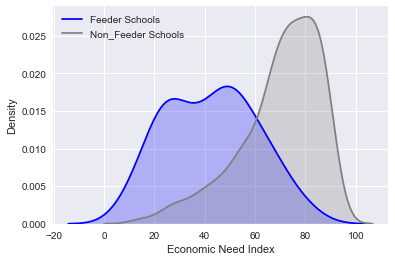

In [11]:
sns.kdeplot(Feeder_Schools['Economic Need Index_x'],shade= True, color ='blue',label='Feeder Schools')
sns.kdeplot(Non_Feeder_Schools['Economic Need Index_x'],shade= True, color ='grey', label ='Non_Feeder Schools')
plt.xlabel('Economic Need Index')
plt.ylabel('Density')

## Black and Hispanic Population Distribution in Feeder and Non- Feeder Schools

,DBN,School Name_x,Year_x,Total Enrollment,Grade PK (Half Day & Full Day),Grade 8,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index_x,% Black + Hispanic,Bl+Hi_Grade8,% Asian + White,As+Wh_Grade8,% Others,School Name_y,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Community School?,Economic Need Index_y,School Income Estimate,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 8 ELA - All Students Tested,Grade 8 ELA 4s - All Students,Grade 8 ELA 4s - American Indian or Alaska Native,Grade 8 ELA 4s - Black or African American,Grade 8 ELA 4s - Hispanic or Latino,Grade 8 ELA 4s - Asian or Pacific Islander,Grade 8 ELA 4s - White,Grade 8 ELA 4s - Multiracial,Grade 8 ELA 4s - Limited English Proficient,Grade 8 ELA 4s - Economically Disadvantaged,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged,Count of Offers,Count of Students in HS Admissions,Count of Testers,Feeder School DBN,Feeder School Name,Training_Need_Score,Year_y,Awareness_Need_Score,School_type
30,01M184,P.S. 184m Shuang Wen,2016-17,672,36,79,330,49.1,342,50.9,468,69.6,30,4.5,81,12.1,36,5.4,57,8.5,125,18.6,109,16.2,461,68.6,54.0,16.6,13.0,78.1,62.0,5.0,P.S. 184M SHUANG WEN,01M184,1.0,40.711437,-73.985486,"327 CHERRY ST-2ND FL NEW YORK, NY 10002",NEW YORK,10002.0,No,0.559,40809.9,98.0,2.0,90.0,0,81.0,0,91.0,0,67.0,2,83.0,3,85.0,3,1,3.24,3.63,46.0,23.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,16.0,48.0,28.0,0.0,0.0,0.0,25.0,0.0,0.0,2.0,21.0,28,80,64,01M184,P.S. 184M SHUANG WEN,35.00,2016-17,80.00,Feeder
98,01M539,"New Explorations into Science, Technology and ...",2016-17,1745,0,121,866,49.6,879,50.4,579,33.2,140,8.0,193,11.1,113,6.5,720,41.3,107,6.1,7,0.4,441,25.3,23.3,19.1,23.0,74.5,90.0,6.0,0,0,0.0,0.000000,0.000000,0,0,0.0,0,0.000,0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77,121,109,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",63.64,2016-17,90.08,Feeder
110,01M839,Tompkins Square Middle School,2016-17,374,0,122,200,53.5,174,46.5,99,26.5,60,16.0,132,35.3,11,2.9,72,19.3,103,27.5,14,3.7,251,67.1,58.4,51.3,63.0,45.8,56.0,3.0,TOMPKINS SQUARE MIDDLE SCHOOL,01M839,1.0,40.723747,-73.981602,"600 E 6TH ST NEW YORK, NY 10009",NEW YORK,10009.0,No,0.597,0,96.0,7.0,90.0,1,89.0,1,88.0,2,86.0,2,83.0,2,94.0,1,1,2.92,3.01,75.0,12.0,0.0,0.0,5.0,2.0,0.0,0.0,0.0,6.0,59.0,5.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,2.0,8,122,63,01M839,TOMPKINS SQUARE MIDDLE SCHOOL,6.56,2016-17,51.64,Feeder
120,02M104,J.H.S. 104 Simon Baruch,2016-17,1145,0,403,514,44.9,631,55.1,412,36.0,86,7.5,215,18.8,44,3.8,388,33.9,201,17.6,53,4.6,529,46.2,35.9,26.3,106.0,69.9,282.0,4.0,J.H.S. 104 SIMON BARUCH,02M104,2.0,40.735735,-73.980611,"330 E 21ST ST NEW YORK, NY 10010",NEW YORK,10010.0,No,0.522,0,96.0,11.0,87.0,2,89.0,1,85.0,2,84.0,2,70.0,3,92.0,2,1,3.05,3.25,318.0,67.0,0.0,5.0,6.0,27.0,28.0,0.0,0.0,27.0,213.0,23.0,0.0,0.0,2.0,17.0,4.0,0.0,0.0,17.0,83,408,251,02M104,J.H.S. 104 SIMON BARUCH,20.34,2

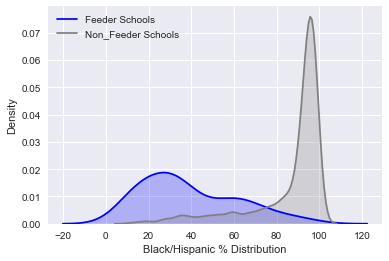

In [12]:
sns.kdeplot(Feeder_Schools['% Black + Hispanic'],shade= True, color ='blue',label='Feeder Schools')
sns.kdeplot(Non_Feeder_Schools['% Black + Hispanic'],shade= True, color ='grey', label ='Non_Feeder Schools')
plt.xlabel('Black/Hispanic % Distribution')
plt.ylabel('Density')
Feeder_Schools

Text(0.5,0,'Black-Hispanic Distribution')

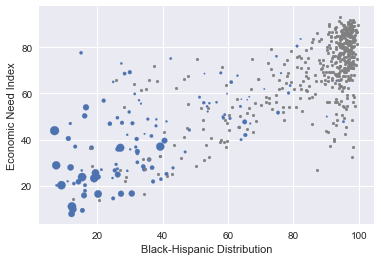

In [13]:
plt.scatter(Feeder_Schools['% Black + Hispanic'],Feeder_Schools['Economic Need Index_x'],s=Feeder_Schools['Training_Need_Score'])
plt.scatter(Non_Feeder_Schools['% Black + Hispanic'],Non_Feeder_Schools['Economic Need Index_x'], color='grey', s=8)
plt.ylabel('Economic Need Index')
plt.xlabel('Black-Hispanic Distribution')

In [14]:
np.corrcoef(school_merg["% Black + Hispanic"], school_merg["Economic Need Index_x"])

array([[1.        , 0.78797633],
       [0.78797633, 1.        ]])

The scatterplot above visualizes the positive correlation (r = 0.79) between Economic Need Index and % Black and Hispanic student population. 
Feeder schools with more students admitted to Specilaised High Schools(SPHS) (blue points) tend to have low-to-medium economic need and lower proportion of Black or Hispanic students, while a noticeable number of non-feeder schools (gray points) cluster around the upper right corner of the plot. In other words, students from these non-feeder schools are mostly low-income Hispanic or Black student that are underrepresented at SPHS.

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [16]:
Training_List = school_merg

Training_List['TRNG_Score'] = Training_List['Training_Need_Score'].map(lambda s: 1 if s != 0 else 0)
Training_List['AWS_Score'] = Training_List['Awareness_Need_Score'].map(lambda s: 1 if s >= 60 else 0)

rnd_clf = RandomForestClassifier(n_estimators = 100 , criterion = 'entropy',random_state = 0)
rnd_clf.fit(Training_List.iloc[:,41:80],Training_List.iloc[:,90]);

Training_List


,DBN,School Name_x,Year_x,Total Enrollment,Grade PK (Half Day & Full Day),Grade 8,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index_x,% Black + Hispanic,Bl+Hi_Grade8,% Asian + White,As+Wh_Grade8,% Others,School Name_y,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Community School?,Economic Need Index_y,School Income Estimate,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 8 ELA - All Students Tested,Grade 8 ELA 4s - All Students,Grade 8 ELA 4s - American Indian or Alaska Native,Grade 8 ELA 4s - Black or African American,Grade 8 ELA 4s - Hispanic or Latino,Grade 8 ELA 4s - Asian or Pacific Islander,Grade 8 ELA 4s - White,Grade 8 ELA 4s - Multiracial,Grade 8 ELA 4s - Limited English Proficient,Grade 8 ELA 4s - Economically Disadvantaged,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged,Count of Offers,Count of Students in HS Admissions,Count of Testers,Feeder School DBN,Feeder School Name,Training_Need_Score,Year_y,Awareness_Need_Score,School_type,TRNG_Score,AWS_Score
7,01M034,P.S. 034 Franklin D. Roosevelt,2016-17,350,13,62,170,48.6,180,51.4,19,5.4,102,29.1,216,61.7,2,0.6,11,3.1,130,37.1,27,7.7,348,99.4,86.8,90.8,56.0,8.5,5.0,1.0,P.S. 034 FRANKLIN D. ROOSEVELT,01M034,1.0,40.726147,-73.975043,"730 E 12TH ST NEW YORK, NY 10009",NEW YORK,10009.0,No,0.860,31454,92.0,28.0,85.0,3,78.0,2,82.0,2,73.0,3,89.0,2,88.0,2,1,2.48,2.47,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,61,10,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,0.00,2016-17,16.39,Non_Feeder,0,0
20,01M140,P.S. 140 Nathan Straus,2016-17,382,18,56,182,47.6,200,52.4,18,4.7,45,11.8,304,79.6,4,1.0,11,2.9,124,32.5,45,11.8,287,75.1,84.3,91.4,51.0,7.6,4.0,1.0,P.S. 140 NATHAN STRAUS,01M140,1.0,40.719128,-73.983283,"123 RIDGE ST NEW YORK, NY 10002",NEW YORK,10002.0,No,0.849,34889.2,93.0,27.0,94.0,2,91.0,3,85.0,2,87.0,2,83.0,2,93.0,2,2,2.21,2.27,61.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,61.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,59,10,01M140,P.S. 140 NATHAN STRAUS,0.00,2016-17,16.95,Non_Feeder,0,0
30,01M184,P.S. 184m Shuang Wen,2016-17,672,36,79,330,49.1,342,50.9,468,69.6,30,4.5,81,12.1,36,5.4,57,8.5,125,18.6,109,16.2,461,68.6,54.0,16.6,13.0,78.1,62.0,5.0,P.S. 184M SHUANG WEN,01M184,1.0,40.711437,-73.985486,"327 CHERRY ST-2ND FL NEW YORK, NY 10002",NEW YORK,10002.0,No,0.559,40809.9,98.0,2.0,90.0,0,81.0,0,91.0,0,67.0,2,83.0,3,85.0,3,1,3.24,3.63,46.0,23.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,16.0,48.0,28.0,0.0,0.0,0.0,25.0,0.0,0.0,2.0,21.0,28,80,64,01M184,P.S. 184M SHUANG WEN,35.00,2016-17,80.00,Feeder,1,1
40,01M188,P.S. 188 The Island School,2016-17,445,29,58,195,43.8,250,56.2,10,2.2,141,31.7,278,62.5,1,0.2,15,3.4,138,31.0,64,14.4,382,85.8,92.9,94.2,55.0,5.6,3.0,0.0,P.S. 188 THE ISLAND SCHOOL,01M188,1.0,40.719870,-73.977376,"442 E HOUSTON ST NEW YORK, NY 10002",NEW YORK,10002.0,Yes,0.917,27881.6,91.0,37.0,100.0,2,100.0,1,99.0,2,99.0,1,92.0,1,99.0,1,2,2.17,2.32,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,3.0,0.0,0.0,3.0,0.0,0

In [17]:
x, y = (list(x) for x in zip(*sorted(zip(rnd_clf.feature_importances_, Training_List.iloc[:,41:80].columns), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importance',
     width = 900, height = 3000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
,
    ),
    margin=dict(
    l=300,
),
)

fig1 = go.Figure(data=[trace2], layout=layout)
iplot(fig1)

In [18]:
for name, importance in zip(Training_List.iloc[:,41:80].columns, rnd_clf.feature_importances_):
    if importance > 0.015:
        print('"' + name + '"'+',')

"Economic Need Index_y",
"School Income Estimate",
"Student Attendance Rate",
"Percent of Students Chronically Absent",
"Rigorous Instruction %",
"Collaborative Teachers %",
"Supportive Environment %",
"Effective School Leadership %",
"Strong Family-Community Ties %",
"Trust %",
"Average ELA Proficiency",
"Average Math Proficiency",
"Grade 8 ELA - All Students Tested",
"Grade 8 ELA 4s - All Students",
"Grade 8 ELA 4s - Black or African American",
"Grade 8 ELA 4s - Hispanic or Latino",
"Grade 8 ELA 4s - Asian or Pacific Islander",
"Grade 8 ELA 4s - White",
"Grade 8 ELA 4s - Economically Disadvantaged",
"Grade 8 Math - All Students Tested",
"Grade 8 Math 4s - All Students",


In [19]:
Training_Model = Training_List[["School Name_x",
"Economic Need Index_y",
"School Income Estimate",
"Student Attendance Rate",
"Percent of Students Chronically Absent",
"Rigorous Instruction %",
"Collaborative Teachers %",
"Supportive Environment %",
"Effective School Leadership %",
"Strong Family-Community Ties %",
"Trust %",
"Average ELA Proficiency",
"Average Math Proficiency",
"Grade 8 ELA - All Students Tested",
"Grade 8 ELA 4s - All Students",
"Grade 8 ELA 4s - Black or African American",
"Grade 8 ELA 4s - Hispanic or Latino",
"Grade 8 ELA 4s - Economically Disadvantaged",
"Grade 8 Math - All Students Tested",
"Grade 8 Math 4s - All Students",
"Grade 8 Math 4s - Economically Disadvantaged",
"TRNG_Score",
"AWS_Score",
"Latitude",
"Longitude"]]
Training_Model

,School Name_x,Economic Need Index_y,School Income Estimate,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %,Average ELA Proficiency,Average Math Proficiency,Grade 8 ELA - All Students Tested,Grade 8 ELA 4s - All Students,Grade 8 ELA 4s - Black or African American,Grade 8 ELA 4s - Hispanic or Latino,Grade 8 ELA 4s - Economically Disadvantaged,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - Economically Disadvantaged,TRNG_Score,AWS_Score,Latitude,Longitude
7,P.S. 034 Franklin D. Roosevelt,0.860,31454,92.0,28.0,85.0,78.0,82.0,73.0,89.0,88.0,2.48,2.47,47.0,1.0,0.0,0.0,0.0,48.0,1.0,0.0,0,0,40.726147,-73.975043
20,P.S. 140 Nathan Straus,0.849,34889.2,93.0,27.0,94.0,91.0,85.0,87.0,83.0,93.0,2.21,2.27,61.0,3.0,0.0,1.0,1.0,61.0,2.0,1.0,0,0,40.719128,-73.983283
30,P.S. 184m Shuang Wen,0.559,40809.9,98.0,2.0,90.0,81.0,91.0,67.0,83.0,85.0,3.24,3.63,46.0,23.0,0.0,0.0,16.0,48.0,28.0,21.0,1,1,40.711437,-73.985486
40,P.S. 188 The Island School,0.917,27881.6,91.0,37.0,100.0,100.0,99.0,99.0,92.0,99.0,2.17,2.32,50.0,0.0,0.0,0.0,0.0,50.0,3.0,3.0,0,0,40.719870,-73.977376
52,"Technology, Arts, and Sciences Studio",0.791,0,90.0,35.0,84.0,78.0,81.0,80.0,74.0,87.0,2.29,2.00,48.0,3.0,0.0,1.0,3.0,47.0,1.0,1.0,0,0,40.729892,-73.984231
62,University Neighborhood Middle School,0.771,0,92.0,26.0,92.0,96.0,92.0,96.0,86.0,96.0,2.26,2.20,28.0,3.0,0.0,2.0,0.0,30.0,1.0,0.0,0,0,40.713343,-73.986069
73,School for Global Leaders,0.764,0,92.0,27.0,79.0,87.0,82.0,77.0,76.0,88.0,2.34,2.48,73.0,7.0,0.0,3.0,5.0,74.0,5.0,4.0,0,0,40.720185,-73.985957
84,East Side Community School,0.000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.000000,0.000000
98,"New Explorations into Science, Technology and ...",0.000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.000000,0.000000
110,Tompkins Square Middle School,0.597,0,96.0,7.0,90.0,89.0,88.0,86.0,83.0,94.0,2.92,3.01,75.0,12.0,0.0,5.0,6.0,59.0,5.0,2.0,1,0,40.723747,-73.981602


In [20]:
# Split the data into training and testing sets
X = Training_Model.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]].values 
y_trng = Training_Model.iloc[:, 21].values

train_features, test_features, train_labels, test_labels = train_test_split(X,y_trng, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)



Training Features Shape: (429, 20)
Training Labels Shape: (429,)
Testing Features Shape: (143, 20)
Testing Labels Shape: (143,)


In [21]:
RFC = RandomForestClassifier()
RFC.fit(train_features, train_labels)

predictions = RFC.predict(test_features)


errors = abs(predictions - test_labels)


# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')



Mean Absolute Error: 0.08 degrees.


In [22]:
kfold = StratifiedKFold(n_splits=9)
random_state = 2
classifier = RandomForestClassifier(random_state=random_state)
cv_result = cross_val_score(classifier, X, y=y_trng, scoring = "accuracy", cv = kfold, n_jobs=4)
cv_means = cv_result.mean()
cv_std = cv_result.std()
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["RandomForest"]})

print(cv_res)

   CrossValMeans  CrossValerrors     Algorithm
0       0.919555        0.038297  RandomForest


Using the RandomForestClassifier gives a MeanAbsolute Error of 0.08 which is very minimal and the cross validation score is 0.92,
which  ensures a  good prediction,as the model ensures a 92% accuracy in prediction.

We can use this  Classifier to create two specific list of schools that need help with training and awareness creation  respectively , from  the ' Non-Feeder schools' category

In [23]:
Non_Feeder_School_List =Training_List[Training_List['School_type']=='Non_Feeder']
Non_Feeder_School_List = Non_Feeder_School_List[["School Name_x",
"Economic Need Index_y",
"School Income Estimate",
"Student Attendance Rate",
"Percent of Students Chronically Absent",
"Rigorous Instruction %",
"Collaborative Teachers %",
"Supportive Environment %",
"Effective School Leadership %",
"Strong Family-Community Ties %",
"Trust %",
"Average ELA Proficiency",
"Average Math Proficiency",
"Grade 8 ELA - All Students Tested",
"Grade 8 ELA 4s - All Students",
"Grade 8 ELA 4s - Black or African American",
"Grade 8 ELA 4s - Hispanic or Latino",
"Grade 8 ELA 4s - Economically Disadvantaged",
"Grade 8 Math - All Students Tested",
"Grade 8 Math 4s - All Students",
"Grade 8 Math 4s - Economically Disadvantaged",
"TRNG_Score",
"AWS_Score",
"Latitude",
"Longitude"]]
Non_Feeder_School_List
X = Non_Feeder_School_List.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]].values 
y_TRNG = Non_Feeder_School_List.iloc[:, 21].values
y_pred_TRNG = RFC.predict(X)




Below is the Final dataframe with the schools marked as '1' and '0' 
    
    where 0 and 1 indicates:
        '0' -> Training aid required 
        '1' -> Training Aid not required
    respectively

In [24]:
y_pred_TRNG_df = pd.DataFrame({'Training_Aid_Reqd':y_pred_TRNG})
School_List = pd.DataFrame({'School_List': Non_Feeder_School_List.iloc[:, 0].values, 'Latitude': Non_Feeder_School_List.iloc[:, 23].values,'Longitude': Non_Feeder_School_List.iloc[:, 24].values})
Training_Aid_Required_School_List = pd.concat(objs=[School_List, y_pred_TRNG_df], axis=1)
Training_Aid_Required_School_List=Training_Aid_Required_School_List.sort_values(by='Training_Aid_Reqd', ascending=True)
#Training_Aid_Required_School_List.loc[Training_Aid_Required_School_List['Training_Aid_Reqd'] == 1,'Training_Aid_Reqd'] = "N"
#Training_Aid_Required_School_List.loc[Training_Aid_Required_School_List['Training_Aid_Reqd'] == 0,'Training_Aid_Reqd'] = "Y"

Training_Aid_Required_School_List

,School_List,Latitude,Longitude,Training_Aid_Reqd
0,P.S. 034 Franklin D. Roosevelt,40.726147,-73.975043,0
310,P.S. 183 Dr. Richard R. Green,40.588936,-73.805282,0
309,P.S. 146 Howard Beach,40.659866,-73.835156,0
308,P.S./M.S. 114 Belle Harbor,40.578277,-73.854294,0
307,P.S. 105 The Bay School,40.595904,-73.781257,0
306,M.S. 053 Brian Piccolo,40.603951,-73.749868,0
305,P.S. 047 Chris Galas,40.606725,-73.820179,0
304,P.S. 043,40.594019,-73.761378,0
303,P.S./M.S 042 R. Vernam,40.594435,-73.794945,0
302,World Journalism Preparatory: A College Board ...,0.000000,0.000000,0


In [46]:
import folium
from folium import plugins
from io import StringIO
import folium 

colors = ['red', 'blue']
d = (Training_Aid_Required_School_List['Training_Aid_Reqd']).astype('int')
cols = [colors[int(i/1)] for i in d]

m = folium.Map([Training_Aid_Required_School_List['Latitude'][0], Training_Aid_Required_School_List['Longitude'][0]], zoom_start=10.5,tiles='OpenStreetMap')

for lat, long,col, schoolname in zip(Training_Aid_Required_School_List['Latitude'], Training_Aid_Required_School_List['Longitude'], cols,Training_Aid_Required_School_List['School_List']):
    folium.CircleMarker([lat, long], color=col, fill=True,tooltip=schoolname, radius=2).add_to(m)
m

Likewise , to create a recommendation list of schools that need awareness creation session of SHSAT exam, I calculate AWS_Score for the schools and use that score to decide whether those schools  need session or not , based on RandomForestClassifier


In [26]:
# Split the data into training and testing sets
X = Training_Model.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]].values 
y_aws = Training_Model.iloc[:, 22].values
train_features, test_features, train_labels, test_labels = train_test_split(X,y_aws, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


Training Features Shape: (429, 20)
Training Labels Shape: (429,)
Testing Features Shape: (143, 20)
Testing Labels Shape: (143,)


In [27]:
RFC = RandomForestClassifier()
RFC.fit(train_features, train_labels)

predictions = RFC.predict(test_features)


errors = abs(predictions - test_labels)


# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 0.06 degrees.


In [28]:
kfold = StratifiedKFold(n_splits=9)
random_state = 2
classifier = RandomForestClassifier(random_state=random_state)
cv_result = cross_val_score(classifier, X, y=y_aws, scoring = "accuracy", cv = kfold, n_jobs=4)
cv_means = cv_result.mean()
cv_std = cv_result.std()
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["RandomForest"]})

print(cv_res)

   CrossValMeans  CrossValerrors     Algorithm
0       0.912472        0.031829  RandomForest


Using the RandomForestClassifier gives a MeanAbsolute Error of 0.13 which is very minimal and the cross validation score is 0.91, which ensures a good prediction,as the model ensures a 91% accuracy in prediction.

We can use this Classifier to create two specific list of schools that need help with awareness creation from PASSNYC , from the ' Non-Feeder schools' category

In [29]:
Non_Feeder_School_List
X = Non_Feeder_School_List.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]].values 
y_AWS = Non_Feeder_School_List.iloc[:, 22].values
y_pred_AWS = RFC.predict(X)
Non_Feeder_School_List



,School Name_x,Economic Need Index_y,School Income Estimate,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %,Average ELA Proficiency,Average Math Proficiency,Grade 8 ELA - All Students Tested,Grade 8 ELA 4s - All Students,Grade 8 ELA 4s - Black or African American,Grade 8 ELA 4s - Hispanic or Latino,Grade 8 ELA 4s - Economically Disadvantaged,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - Economically Disadvantaged,TRNG_Score,AWS_Score,Latitude,Longitude
7,P.S. 034 Franklin D. Roosevelt,0.860,31454,92.0,28.0,85.0,78.0,82.0,73.0,89.0,88.0,2.48,2.47,47.0,1.0,0.0,0.0,0.0,48.0,1.0,0.0,0,0,40.726147,-73.975043
20,P.S. 140 Nathan Straus,0.849,34889.2,93.0,27.0,94.0,91.0,85.0,87.0,83.0,93.0,2.21,2.27,61.0,3.0,0.0,1.0,1.0,61.0,2.0,1.0,0,0,40.719128,-73.983283
40,P.S. 188 The Island School,0.917,27881.6,91.0,37.0,100.0,100.0,99.0,99.0,92.0,99.0,2.17,2.32,50.0,0.0,0.0,0.0,0.0,50.0,3.0,3.0,0,0,40.719870,-73.977376
52,"Technology, Arts, and Sciences Studio",0.791,0,90.0,35.0,84.0,78.0,81.0,80.0,74.0,87.0,2.29,2.00,48.0,3.0,0.0,1.0,3.0,47.0,1.0,1.0,0,0,40.729892,-73.984231
62,University Neighborhood Middle School,0.771,0,92.0,26.0,92.0,96.0,92.0,96.0,86.0,96.0,2.26,2.20,28.0,3.0,0.0,2.0,0.0,30.0,1.0,0.0,0,0,40.713343,-73.986069
73,School for Global Leaders,0.764,0,92.0,27.0,79.0,87.0,82.0,77.0,76.0,88.0,2.34,2.48,73.0,7.0,0.0,3.0,5.0,74.0,5.0,4.0,0,0,40.720185,-73.985957
84,East Side Community School,0.000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.000000,0.000000
184,P.S./I.S. 217 Roosevelt Island,0.293,93388.1,95.0,10.0,93.0,95.0,89.0,88.0,89.0,92.0,2.90,3.01,18.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0,0,40.763969,-73.948468
195,Ella Baker School,0.429,58096.6,92.0,26.0,91.0,91.0,93.0,82.0,95.0,90.0,2.71,2.75,13.0,3.0,0.0,1.0,1.0,13.0,5.0,2.0,0,0,40.765368,-73.959696
244,I.S. 289,0.313,0,97.0,2.0,91.0,97.0,82.0,95.0,84.0,93.0,3.18,3.26,83.0,24.0,3.0,0.0,9.0,82.0,26.0,10.0,0,0,40.716867,-74.013623


In [30]:
y_pred_AWS_df = pd.DataFrame({'Awareness_Sessions_Reqd':y_pred_AWS})
#School_List = pd.DataFrame({'School_List': Non_Feeder_School_List.iloc[:, 0].values},'')
School_List = pd.DataFrame({'School_List': Non_Feeder_School_List.iloc[:, 0].values, 'Latitude': Non_Feeder_School_List.iloc[:, 23].values,'Longitude': Non_Feeder_School_List.iloc[:, 24].values})
Awareness_Sessions_Required_School_List = pd.concat(objs=[School_List, y_pred_AWS_df], axis=1)
Awareness_Sessions_Required_School_List= Awareness_Sessions_Required_School_List.sort_values(by='Awareness_Sessions_Reqd', ascending=True)
#Awareness_Sessions_Required_School_List.loc[Awareness_Sessions_Required_School_List['Awareness_Sessions_Reqd'] == 1,'Awareness_Sessions_Reqd'] = "N"
#Awareness_Sessions_Required_School_List.loc[Awareness_Sessions_Required_School_List['Awareness_Sessions_Reqd'] == 0,'Awareness_Sessions_Reqd'] = "Y"

Awareness_Sessions_Required_School_List

,School_List,Latitude,Longitude,Awareness_Sessions_Reqd
0,P.S. 034 Franklin D. Roosevelt,40.726147,-73.975043,0
305,P.S. 047 Chris Galas,40.606725,-73.820179,0
304,P.S. 043,40.594019,-73.761378,0
303,P.S./M.S 042 R. Vernam,40.594435,-73.794945,0
302,World Journalism Preparatory: A College Board ...,0.000000,0.000000,0
301,"Queens School of Inquiry, The",0.000000,0.000000,0
300,I.S. 250 The Robert F. Kennedy Community Middl...,40.724191,-73.809370,0
299,P.S./M.S. 200 - The Pomonok School & STAR Academy,40.731060,-73.805449,0
298,"Robert F. Wagner, Jr. Secondary School for Art...",0.000000,0.000000,0
297,Corona Arts & Sciences Academy,40.743204,-73.871482,0


In [45]:
import folium
from folium import plugins
from io import StringIO
import folium 

colors = ['blue', 'red']
d = (Awareness_Sessions_Required_School_List['Awareness_Sessions_Reqd']).astype('int')
cols = [colors[int(i/1)] for i in d]

m = folium.Map([Awareness_Sessions_Required_School_List['Latitude'][0], Awareness_Sessions_Required_School_List['Longitude'][0]], zoom_start=10.5,tiles="OpenStreetMap")



for lat, long, col,schoolname in zip(Awareness_Sessions_Required_School_List['Latitude'], Awareness_Sessions_Required_School_List['Longitude'], cols,Awareness_Sessions_Required_School_List['School_List']):
    folium.CircleMarker([lat, long], color=col, fill=True,tooltip=schoolname,radius=2).add_to(m)
m